# Project: House Price Prediction
This project aims to predict house prices based on various features such as size, location, number of rooms, etc. You will explore, prepare, and analyze the data, then build a regression model to make predictions.

## Step 1: Importing and Exploring the Data
1. Import the necessary libraries: `pandas`, `numpy`, and `matplotlib`.
2. Load the dataset (e.g., `house_prices.csv`).
3. Display the first few rows of the dataset to understand its structure.
4. Analyze descriptive statistics of the data (mean, median, etc.).
5. Check for missing values in the columns.

Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the dataset

In [22]:
df = pd.read_csv("data/house-prices/train.csv")
df_test = pd.read_csv("data/house-prices/test.csv")

Display rows

In [23]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
data_shape = df.shape
data_shape

(1460, 81)

In [25]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [26]:
# Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Analyze missing values

In [27]:
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [28]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
df['GarageType'] = df['GarageType'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('NoGarage')

df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBasement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')
df['BsmtQual'] = df['BsmtQual'].fillna('NoBasement')
df['BsmtCond'] = df['BsmtCond'].fillna('NoBasement')

df['Alley'] = df['Alley'].fillna('NoAlley')

df['PoolQC'] = df['PoolQC'].fillna('NoPool')

df['MiscFeature'] = df['MiscFeature'].fillna('NoMiscFeature')

df['Fence'] = df['Fence'].fillna('NoFence')

df['MasVnrType'] = df['MasVnrType'].fillna('NoMasVnrType')

df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

df.dropna(inplace=True, axis=0, subset=["MasVnrArea", "Electrical"])

df.isna().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [29]:
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
df_test['GarageType'] = df_test['GarageType'].fillna('NoGarage')
df_test['GarageCond'] = df_test['GarageCond'].fillna('NoGarage')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('NoGarage')
df_test['GarageQual'] = df_test['GarageQual'].fillna('NoGarage')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna('NoGarage')

df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NoBasement')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('NoBasement')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NoBasement')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('NoBasement')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('NoBasement')

df_test['Alley'] = df_test['Alley'].fillna('NoAlley')

df_test['PoolQC'] = df_test['PoolQC'].fillna('NoPool')

df_test['MiscFeature'] = df_test['MiscFeature'].fillna('NoMiscFeature')

df_test['Fence'] = df_test['Fence'].fillna('NoFence')

df_test['MasVnrType'] = df_test['MasVnrType'].fillna('NoMasVnrType')

df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NoFireplace')

df_test.dropna(inplace=True, axis=0, subset=["MasVnrArea", "Electrical"])

df_test.isna().sum().sort_values(ascending=False)

MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

## Step 2: Visualizing the Data
1. Create a histogram to visualize the distribution of prices.
2. Make a scatter plot between two variables (e.g., size and price).
3. Identify relationships between variables using a correlation heatmap.

Create histogram for the distribution of prices

<Figure size 1000x600 with 0 Axes>

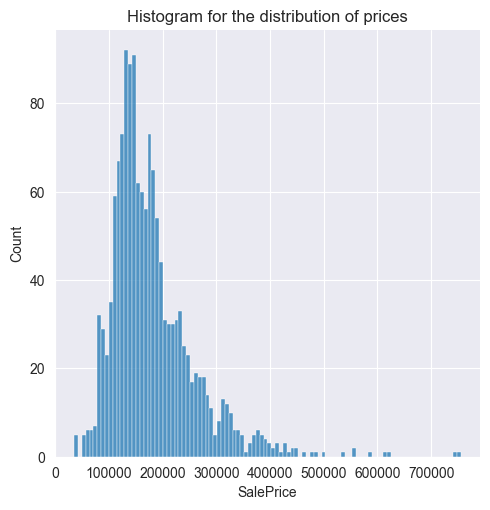

In [30]:
plt.figure(figsize=(10, 6))
sns.displot(df["SalePrice"], bins=100)
plt.title('Histogram for the distribution of prices')
plt.show()

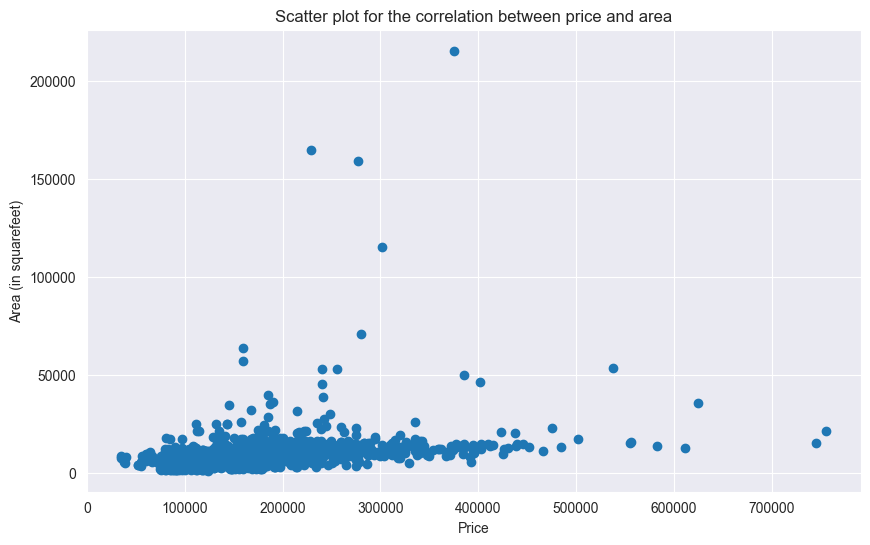

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SalePrice'], df['LotArea'])
plt.xlabel('Price')
plt.ylabel('Area (in squarefeet)')
plt.title('Scatter plot for the correlation between price and area')
plt.show()

Correlation Matrix heatmap

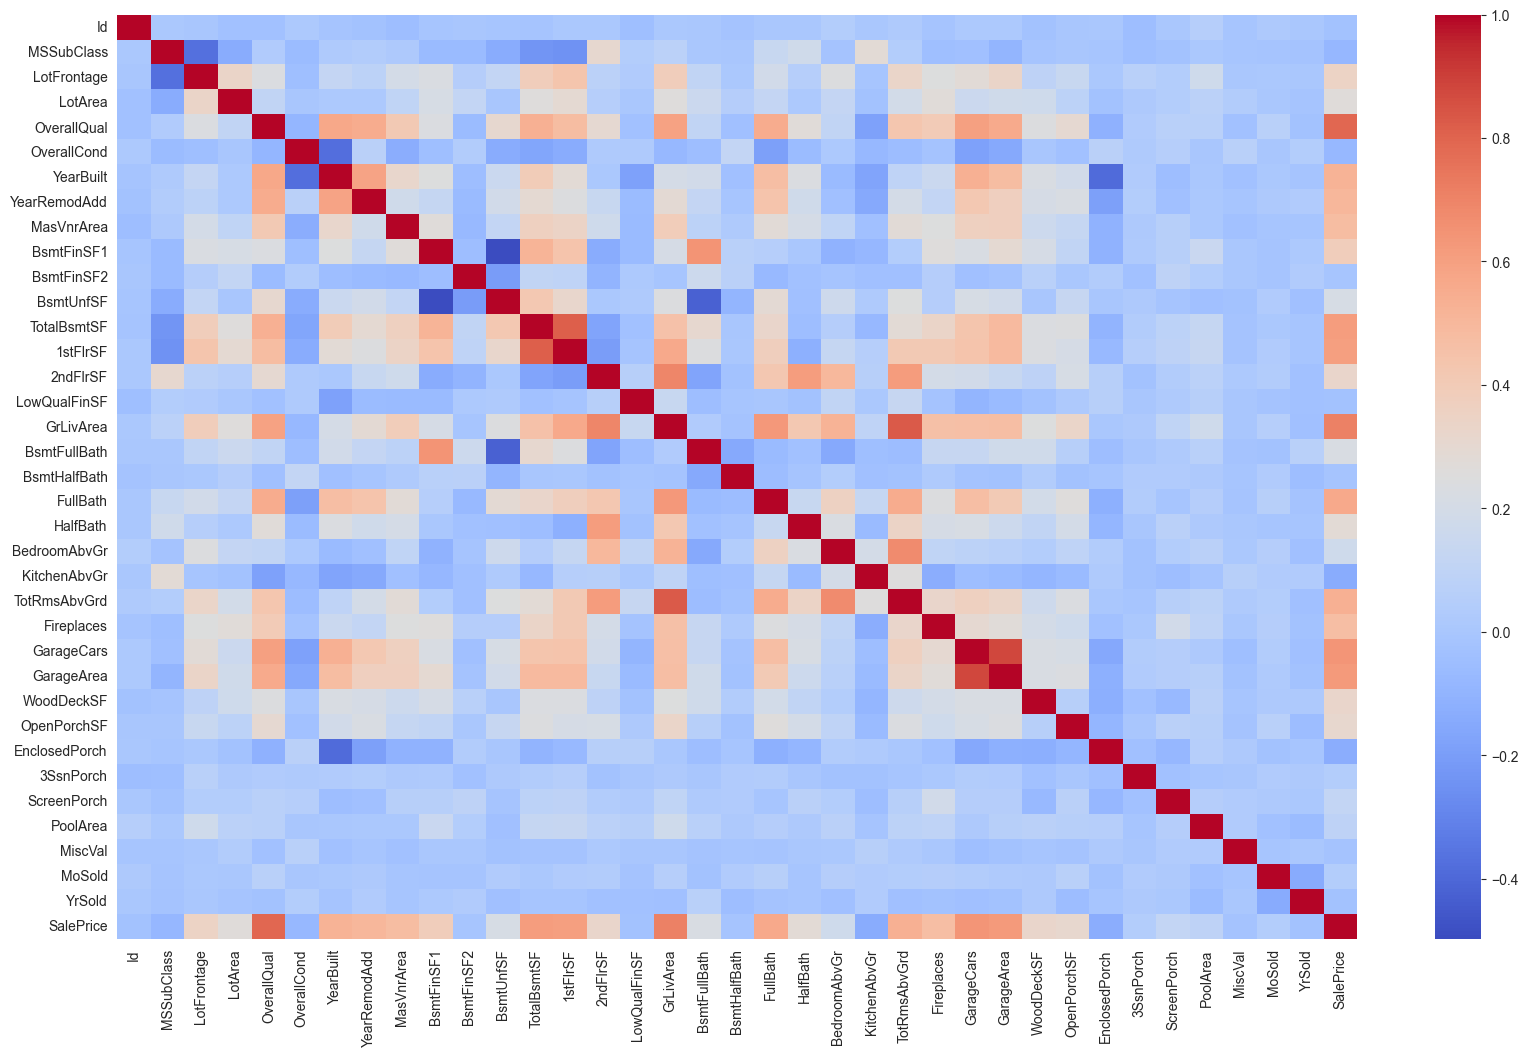

In [32]:
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".2f")
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

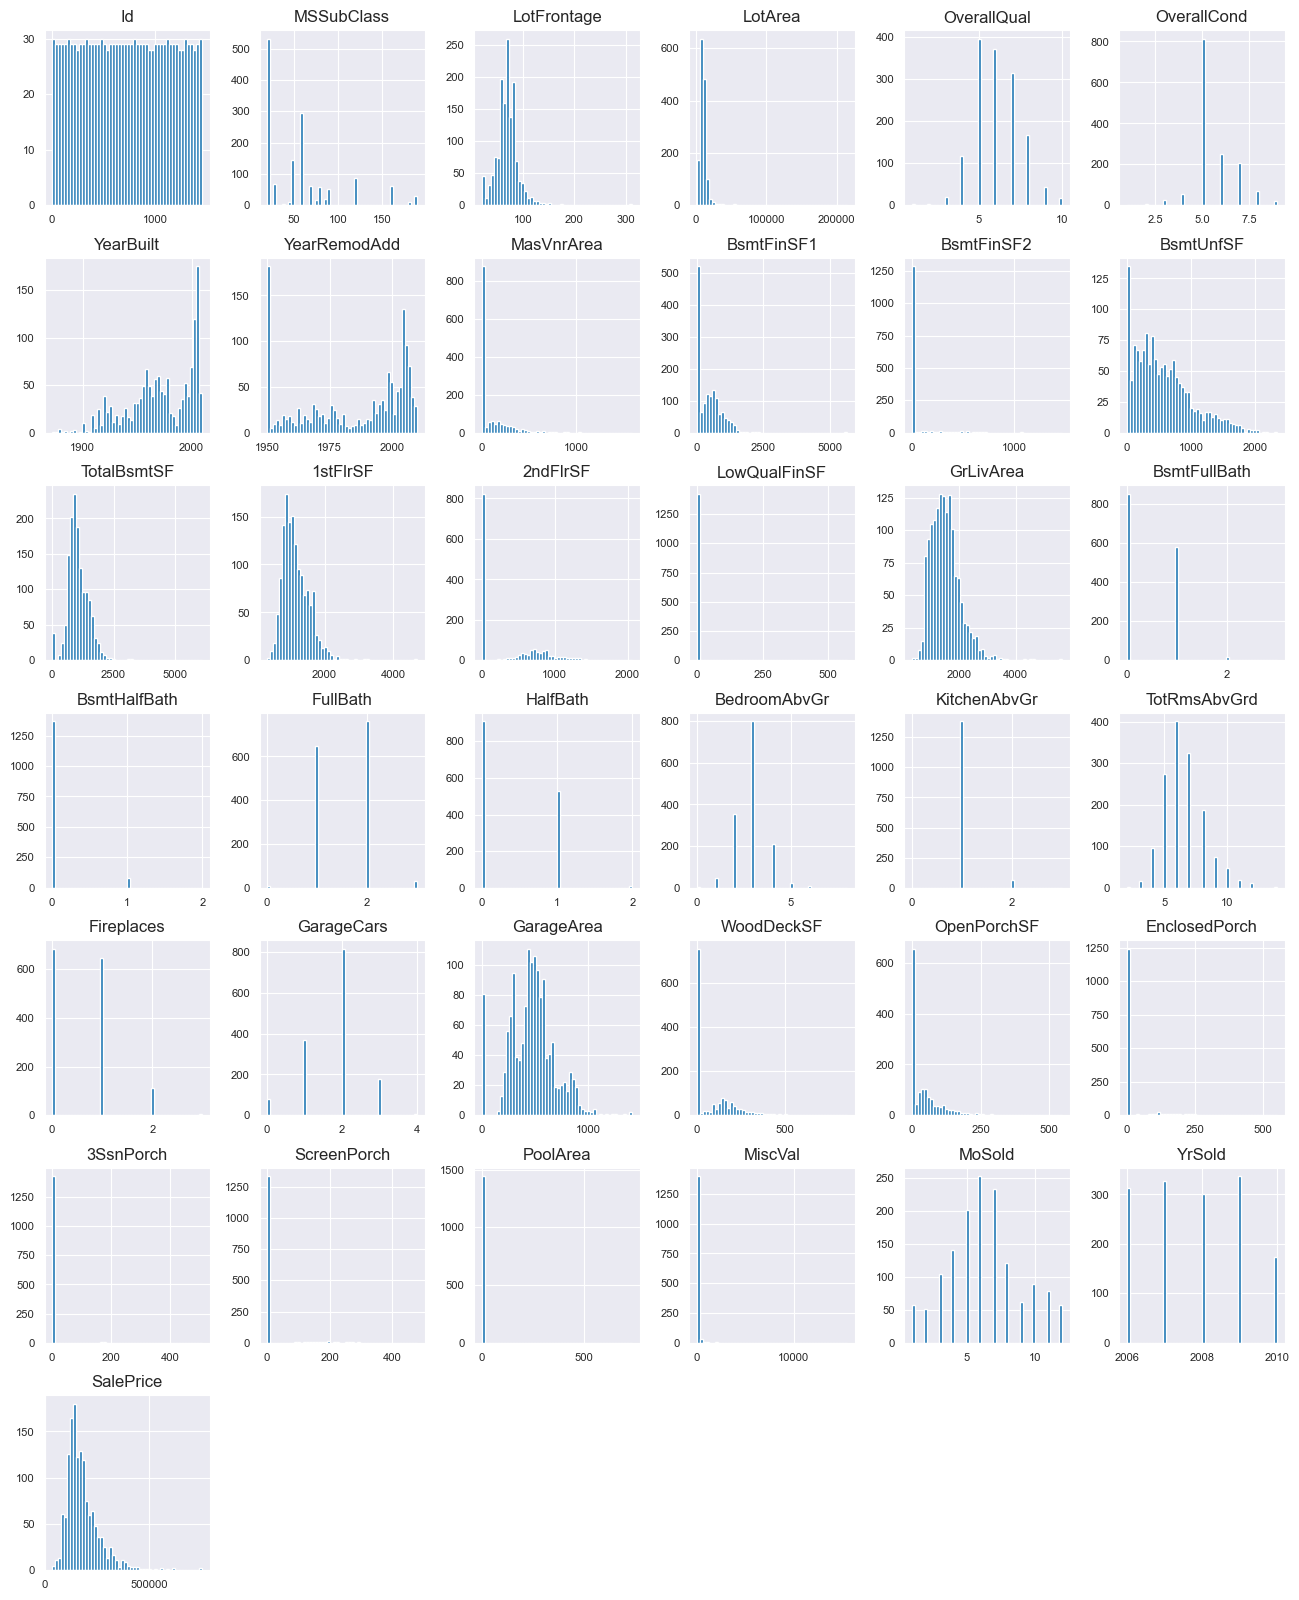

In [33]:
df_num = df.select_dtypes(include=["float64", "int64"])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


## Step 3: Data Preparation
1. Handle missing values (fill or drop rows/columns).
2. Encode categorical variables if necessary (e.g., `One-Hot Encoding`).
3. Split the data into training and testing sets (80% / 20%).

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.727674,0.072441,RL,-0.230942,-0.205996,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-1.600006,0.138985,WD,Normal,0.351592
1,-1.725302,-0.872386,RL,0.437425,-0.090876,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-0.488657,-0.613506,WD,Normal,0.011047
2,-1.722930,0.072441,RL,-0.097269,0.074297,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,0.993142,0.138985,WD,Normal,0.540783
3,-1.720558,0.308648,RL,-0.453731,-0.095881,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-1.600006,-1.365998,WD,Abnorml,-0.512382
4,-1.718186,0.072441,RL,0.615656,0.375612,Pave,NoAlley,IR1,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,2.104491,0.138985,WD,Normal,0.875021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.723526,0.072441,RL,-0.364615,-0.259352,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,0.622692,-0.613506,WD,Normal,-0.070935
1456,1.725898,-0.872386,RL,0.660214,0.266998,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,MnPrv,NoMiscFeature,-0.087961,-1.600006,1.643969,WD,Normal,0.370511
1457,1.728270,0.308648,RL,-0.186384,-0.146734,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,GdPrv,Shed,4.937397,-0.488657,1.643969,WD,Normal,1.083132
1458,1.730642,-0.872386,RL,-0.097269,-0.079164,Pave,NoAlley,Reg,Lvl,AllPub,...,-0.068905,NoPool,NoFence,NoMiscFeature,-0.087961,-0.859106,1.643969,WD,Normal,-0.485580


In [35]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.extend(['MSSubClass'])
print(cat_cols)
df.drop(columns=cat_cols, inplace=True)
df_test.drop(columns=cat_cols, inplace=True)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [36]:
#one-hot encoding
#df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
#df_test_encoded = pd.get_dummies(df_test, columns=cat_cols, drop_first=False)
df_test_encoded = df_test
df_encoded = df
df

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.727674,-0.230942,-0.205996,0.656247,-0.520740,1.057250,0.883532,0.509503,0.579345,-0.289621,...,-0.752932,0.220747,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,0.138985,0.351592
1,-1.725302,0.437425,-0.090876,-0.067870,2.174601,0.162613,-0.424340,-0.573097,1.176868,-0.289621,...,1.623585,-0.702973,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-0.488657,-0.613506,0.011047
2,-1.722930,-0.097269,0.074297,0.656247,-0.520740,0.990980,0.835093,0.321705,0.096054,-0.289621,...,-0.752932,-0.066969,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,0.993142,0.138985,0.540783
3,-1.720558,-0.453731,-0.095881,0.656247,-0.520740,-1.858602,-0.714978,-0.573097,-0.497076,-0.289621,...,-0.752932,-0.172970,4.093291,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,-1.365998,-0.512382
4,-1.718186,0.615656,0.375612,1.380365,-0.520740,0.957846,0.738213,1.360116,0.467309,-0.289621,...,0.778247,0.569034,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,2.104491,0.138985,0.875021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.723526,-0.364615,-0.259352,-0.067870,-0.520740,0.924711,0.738213,-0.573097,-0.971580,-0.289621,...,-0.752932,-0.097255,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,0.622692,-0.613506,-0.070935
1456,1.725898,0.660214,0.266998,-0.067870,0.377707,0.228883,0.156937,0.084196,0.763874,0.718284,...,2.030304,-0.702973,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,1.643969,0.370511
1457,1.728270,-0.186384,-0.146734,0.656247,3.073048,-0.997100,1.028852,-0.573097,-0.367466,-0.289621,...,-0.752932,0.205604,-0.359363,-0.116704,-0.271106,-0.068905,4.937397,-0.488657,1.643969,1.083132
1458,1.730642,-0.097269,-0.079164,-0.791988,0.377707,-0.698888,0.544454,-0.573097,-0.863937,6.073166,...,2.165877,-0.702973,1.474083,-0.116704,-0.271106,-0.068905,-0.087961,-0.859106,1.643969,-0.485580


## Step 4: Building a Regression Model
1. Import the `scikit-learn` library.
2. Create a simple linear regression model and train it on the training set.
3. Display the model's coefficients.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_cols = set(df_encoded.columns)
test_cols = set(df_test_encoded.columns)
for col in train_cols - test_cols:
    df_test_encoded[col] = 0
for col in test_cols - train_cols:
    df_encoded[col] = 0
df_encoded = df_encoded[df_test_encoded.columns]

assert list(df_encoded.columns) == list(df_test_encoded.columns)

# 
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

mse_original = mse * (scaler.scale_[-1] ** 2)  # Remettre à l'échelle
rmse_original = np.sqrt(mse_original)  # Erreur moyenne quadratique
print(f"MSE (échelle originale) : {mse_original}")
print(f"RMSE (échelle originale) : {rmse_original}")

Mean Squared Error: 0.13033597303358135
R² Score: 0.8531469098720114
MSE (échelle originale) : 819302153.2519839
RMSE (échelle originale) : 28623.45460023971


A RMSE of 28623 means that the predictions are close of 28623$ from the original price of the house. In our case, it looks good. However, we removed all the categorical columns. To upgrade our model, we will try to add some categorical columns to check if this produce a better result.

## Step 5: Model Evaluation
1. Predict prices on the test set.
2. Evaluate the model using metrics such as RMSE, MAE, or R².
3. Analyze the errors and identify cases where the model performed poorly.

## Step 6: Improving the Model
1. Try other regression models, such as Ridge or Lasso regression.
2. Perform hyperparameter tuning (e.g., using `GridSearchCV`).
3. Compare the performance of different models.

In [38]:
# Your code here

## Step 7: Conclusion
1. Summarize your results.
2. Explain the strengths and limitations of your model.
3. Propose ideas to further improve performance.

In [39]:
# Your code here